<a href="https://colab.research.google.com/github/lsofiadb/Crop-yield-prediction-model/blob/main/Preparaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ETAPAS PREPARACION DE DATOS**

Primero revisar que los rendimientos estén bien calculado 


Revisar que los semestres A y B coincidan con los periodos

Graficar columna de rendimiento


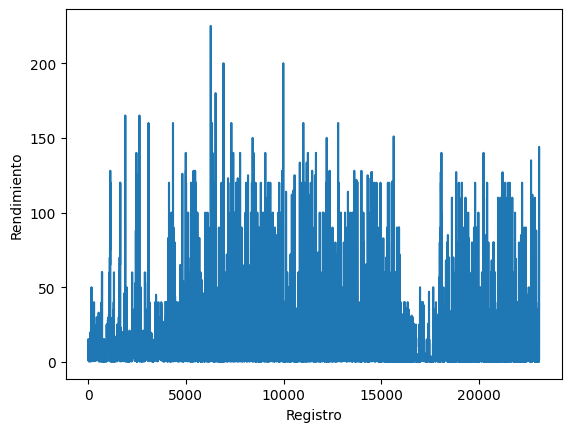

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df_original = pd.read_csv('./sample_data/dataset.csv')

# Seleccionar la columna que se desea graficar
columna = df_original['Rendimiento (t/ha)']

# Graficar los datos
plt.plot(columna)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Rendimiento')

# Mostrar el gráfico
plt.show()


In [ ]:
print(df_original.loc[5240])

TIPO                   CULTIVOS PERMANENTES
MUNICIPIO                            BOYACA
CULTIVO                             DURAZNO
PERIODO                                2013
Area Sembrada (ha)                      3.0
Area Cosechada (ha)                     0.0
Produccion (t)                          0.0
Rendimiento (t/ha)                      NaN
Name: 5240, dtype: object


In [ ]:
print(df_original.head(20))

                                TIPO            MUNICIPIO   CULTIVO PERIODO  \
0               CULTIVOS PERMANENTES              RAQUIRA     AGRAZ    2015   
1   CULTIVOS TRANSITORIOS SEMESTRE A             BUSBANZA   AHUYAMA   2018A   
2               CULTIVOS PERMANENTES           BUENAVISTA  AGUACATE    2015   
3               CULTIVOS PERMANENTES                COPER  AGUACATE    2015   
4               CULTIVOS PERMANENTES                COPER  AGUACATE    2015   
5               CULTIVOS PERMANENTES                COPER  AGUACATE    2015   
6               CULTIVOS PERMANENTES           COVARACHIA  AGUACATE    2015   
7               CULTIVOS PERMANENTES            EL ESPINO  AGUACATE    2015   
8               CULTIVOS PERMANENTES             JENESANO  AGUACATE    2015   
9               CULTIVOS PERMANENTES          LA VICTORIA  AGUACATE    2015   
10              CULTIVOS PERMANENTES           MIRAFLORES  AGUACATE    2015   
11              CULTIVOS PERMANENTES                

# 1.Deteccion de valores faltantes

## Validación columna Rendimiento

In [ ]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('./sample_data/dataset.csv')

# Definir las columnas
columna1 = df['Produccion (t)']
columna2 = df['Area Cosechada (ha)']
columna3 = df['Rendimiento (t/ha)']

# Calcular la división de las dos primeras columnas
division = columna1 / columna2

# Verificar si la columna 3 es igual a la división calculada
validacion = columna3 != division

# Contar el número de filas en las que la validación es verdadera
contador = validacion.sum()

# Crear un nuevo dataframe con las filas donde se cumple la validación
df_valido = df[validacion]

# Imprimir el nuevo dataframe
print(df_valido)

# Imprimir el resultado
print(f'Hay {contador} filas en las que la columna 3 es diferente a la división de las columnas 1 y 2.')


                       TIPO           MUNICIPIO     CULTIVO PERIODO  \
6      CULTIVOS PERMANENTES          COVARACHIA    AGUACATE    2015   
18     CULTIVOS PERMANENTES              RONDON    AGUACATE    2015   
37     CULTIVOS PERMANENTES               NOBSA       BREVO    2015   
53     CULTIVOS PERMANENTES  SAN LUIS DE GACENO       CACAO    2015   
64     CULTIVOS PERMANENTES               CHITA        CAFE    2015   
...                     ...                 ...         ...     ...   
23068            Permanente           Zetaquirá        Café    2021   
23070            Permanente           Zetaquirá    Aguacate    2021   
23072            Permanente           Zetaquirá    Pitahaya    2021   
23074            Permanente           Zetaquirá  Granadilla    2021   
23079           Transitorio           Zetaquirá      Frijol   2021B   

       Area Sembrada (ha)  Area Cosechada (ha)  Produccion (t)  \
6                     8.0                  NaN             NaN   
18             

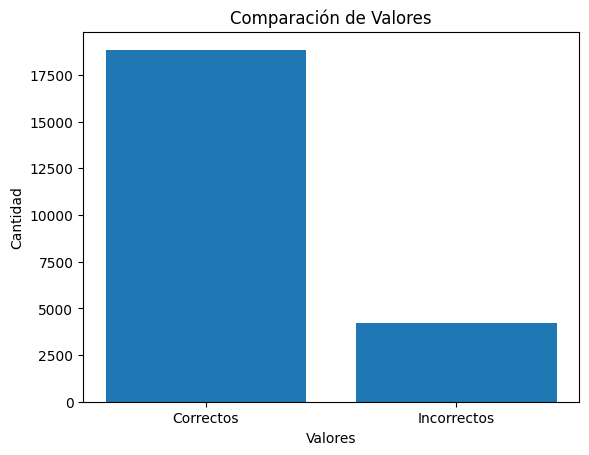

In [ ]:
import matplotlib.pyplot as plt

# Datos
categorias = ['Correctos', 'Incorrectos']

datosCorrectos = len(df_original)-contador

datos = [datosCorrectos, contador]

# Configurar la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
ax.bar(categorias, datos)

# Configurar etiquetas y título
ax.set_xlabel('Valores')
ax.set_ylabel('Cantidad')
ax.set_title('Comparación de Valores')

# Mostrar la gráfica
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

data = pd.read_csv('./sample_data/dataset.csv')

# Verificar si hay valores faltantes
print("Valores faltantes:\n", data.isnull().sum())

# Eliminar los registros con valores faltantes en otras columnas
data.dropna(subset=data.columns.difference(['Area Cosechada (ha)']), inplace=True)
data.dropna(subset=data.columns.difference(['Produccion (t)']), inplace=True)

# Encontrar los valores faltantes en una columna específica
missing_values = data['Rendimiento (t/ha)'].isnull()

# Mostrar los registros con valores faltantes en la columna específica
print("aaaaaaa",data[missing_values])



Valores faltantes:
 TIPO                     0
MUNICIPIO                0
CULTIVO                  0
PERIODO                  0
Area Sembrada (ha)       0
Area Cosechada (ha)    206
Produccion (t)         219
Rendimiento (t/ha)     231
dtype: int64
aaaaaaa Empty DataFrame
Columns: [TIPO, MUNICIPIO, CULTIVO, PERIODO, Area Sembrada (ha), Area Cosechada (ha), Produccion (t), Rendimiento (t/ha)]
Index: []


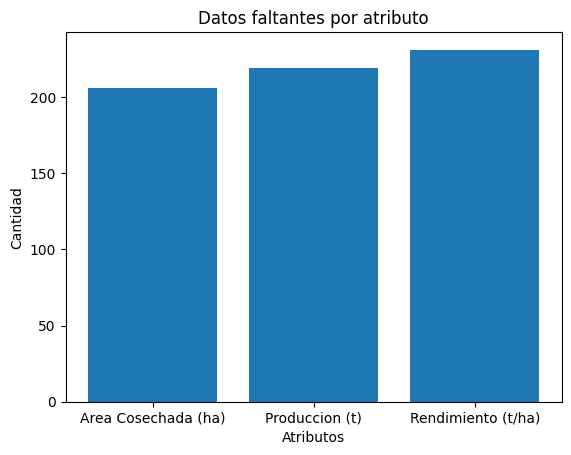

In [ ]:
import matplotlib.pyplot as plt

# Datos
categorias = ['Area Cosechada (ha)', 'Produccion (t)','Rendimiento (t/ha)']


datos = [206,219,231]

# Configurar la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
ax.bar(categorias, datos)

# Configurar etiquetas y título
ax.set_xlabel('Atributos')
ax.set_ylabel('Cantidad')
ax.set_title('Datos faltantes por atributo')

# Mostrar la gráfica
plt.show()

## Encontrar registros con un solo valor nulo

In [ ]:
import pandas as pd

# Cargar el dataset desde el archivo CSV
dataFrame_Boyaca = pd.read_csv('./sample_data/dataset.csv')

#Seleccionar columnas específicas para el analisis
selected_cols = dataFrame_Boyaca[['Area Cosechada (ha)', 'Produccion (t)','Rendimiento (t/ha)']]

#Crear dataframe a partir de los nulos y no nulos
null_mask = selected_cols.isnull()

#Contar número de valores nulos
null_counts = null_mask.sum()

#Se crea una serie de los registros que tengan un solo valor nulo
any_null = null_mask.any(axis=1)

#Se crea un dataframe que filtra los registros que tienen un solo valor nulo
one_null = selected_cols[any_null & (null_mask.sum(axis=1) == 1)]

more_than_one_null = selected_cols[any_null & (null_mask.sum(axis=1) >1)]

#Se obtiene el dataframe con un solo valor nulo
df_un_nulo = one_null.copy()

df_valores_nulos = more_than_one_null.copy()

#Mostrar en pantalla
print(df_un_nulo)

print(df_valores_nulos)



       Area Cosechada (ha)  Produccion (t)  Rendimiento (t/ha)
4780                   1.0            11.5                 NaN
5240                   0.0             0.0                 NaN
6867                   0.0             0.0                 NaN
6982                   0.0             0.0                 NaN
7784                   0.0             0.0                 NaN
8050                   0.0             0.0                 NaN
8359                   0.0             0.0                 NaN
8944                   0.0             0.0                 NaN
9262                   0.0             0.0                 NaN
10423                150.0             NaN               112.0
10669                 23.0             NaN                 0.0
11093                  2.0             7.0                 NaN
11847                  0.0             0.0                 NaN
14265                  0.0             0.0                 NaN
       Area Cosechada (ha)  Produccion (t)  Rendimiento

## Eliminar registros con más de un valor nulo

In [ ]:
# Obtener los índices que deben eliminarse
indices_a_eliminar = df_valores_nulos.index

# Eliminar los registros de df1 basándose en los índices
dataFrame_Boyaca = dataFrame_Boyaca.drop(indices_a_eliminar)


In [ ]:
#Comprobar que el registro se elimmino
print("\n ----------------------")

print(dataFrame_Boyaca.loc[7])


 ----------------------
TIPO                   CULTIVOS PERMANENTES
MUNICIPIO                         EL ESPINO
CULTIVO                            AGUACATE
PERIODO                                2015
Area Sembrada (ha)                      5.0
Area Cosechada (ha)                     1.5
Produccion (t)                         15.0
Rendimiento (t/ha)                     10.0
Name: 7, dtype: object


## Eliminar registros que tengan una columna con valor nulo y alguna de las dos columnas con valor 0 


In [ ]:
df_un_nulo

#Filtrar los registros que cumplan la condición
df_filtrado = df_un_nulo.loc[(df_un_nulo['Area Cosechada (ha)']==0) | (df_un_nulo['Produccion (t)']==0) | (df_un_nulo['Rendimiento (t/ha)']==0)]

#Mostrar en pantalla
print(df_filtrado)

       Area Cosechada (ha)  Produccion (t)  Rendimiento (t/ha)
5240                   0.0             0.0                 NaN
6867                   0.0             0.0                 NaN
6982                   0.0             0.0                 NaN
7784                   0.0             0.0                 NaN
8050                   0.0             0.0                 NaN
8359                   0.0             0.0                 NaN
8944                   0.0             0.0                 NaN
9262                   0.0             0.0                 NaN
10669                 23.0             NaN                 0.0
11847                  0.0             0.0                 NaN
14265                  0.0             0.0                 NaN


In [ ]:
# Obtener los índices que deben eliminarse
indices_a_eliminar = df_filtrado.index

# Eliminar los registros de df1 basándose en los índices
dataFrame_Boyaca = dataFrame_Boyaca.drop(indices_a_eliminar)

Con lo anterior se eliminan los registros que no aportan información

Comprobación de la eliminación

In [ ]:
#Comprobar que el registro se elimmino
print("\n ----------------------")

print(dataFrame_Boyaca.loc[5241])


 ----------------------
TIPO                   CULTIVOS TRANSITORIOS SEMESTRE B
MUNICIPIO                                          PAYA
CULTIVO                                          ARVEJA
PERIODO                                           2014B
Area Sembrada (ha)                                  4.0
Area Cosechada (ha)                                 3.0
Produccion (t)                                      4.2
Rendimiento (t/ha)                                  1.4
Name: 5241, dtype: object


## Guardar registros a estimar (Valor faltante)

In [ ]:
# Obtener los índices que deben eliminarse
indices_a_eliminar = df_filtrado.index

# Eliminar los registros de df1 basándose en los índices
df_valores_faltantes = df_un_nulo.drop(indices_a_eliminar)

In [ ]:
print(df_valores_faltantes)

       Area Cosechada (ha)  Produccion (t)  Rendimiento (t/ha)
4780                   1.0            11.5                 NaN
10423                150.0             NaN               112.0
11093                  2.0             7.0                 NaN


## Reparar datos

In [ ]:
# Realizar la reparación de valores faltantes
df_valores_corregidos= df_valores_faltantes.copy()

valor_faltante = 0 


for index, row in df_valores_corregidos.iterrows():
  if pd.isnull(df_valores_corregidos.loc[index,'Area Cosechada (ha)']) :
    valor_faltante = row['Rendimiento (t/ha)']*row['Produccion (t)']
    df_valores_corregidos.loc[index, 'Area Cosechada (ha)'] = valor_faltante

  elif pd.isnull(df_valores_corregidos.loc[index,'Produccion (t)']):
    valor_faltante = row['Rendimiento (t/ha)']*row['Area Cosechada (ha)']
    df_valores_corregidos.loc[index, 'Produccion (t)'] = valor_faltante

  else:
    valor_faltante = row['Produccion (t)']/row['Area Cosechada (ha)']
    df_valores_corregidos.loc[index, 'Rendimiento (t/ha)'] = valor_faltante

  print("\n")
  valor_faltante = 0 

print(df_valores_corregidos)









       Area Cosechada (ha)  Produccion (t)  Rendimiento (t/ha)
4780                   1.0            11.5                11.5
10423                150.0         16800.0               112.0
11093                  2.0             7.0                 3.5


### Reemplazar valores reparados

In [ ]:
dataFrame_Boyaca.update(df_valores_corregidos)

# Verificar si hay valores nulos en el dataframe
hay_nulos = dataFrame_Boyaca.isnull().any()

# Mostrar los resultados
print(hay_nulos)

TIPO                   False
MUNICIPIO              False
CULTIVO                False
PERIODO                False
Area Sembrada (ha)     False
Area Cosechada (ha)    False
Produccion (t)         False
Rendimiento (t/ha)     False
dtype: bool


## Comprobación valores NAN


In [ ]:
hay_nulos = dataFrame_Boyaca.isna().any()
recuento_nulos = dataFrame_Boyaca.isna().sum()
print(recuento_nulos)

TIPO                   0
MUNICIPIO              0
CULTIVO                0
PERIODO                0
Area Sembrada (ha)     0
Area Cosechada (ha)    0
Produccion (t)         0
Rendimiento (t/ha)     0
dtype: int64


In [ ]:
print(dataFrame_Boyaca.loc[11093])

TIPO                   CULTIVOS PERMANENTES
MUNICIPIO                          PAJARITO
CULTIVO                             GUANDUL
PERIODO                                2016
Area Sembrada (ha)                      5.0
Area Cosechada (ha)                     2.0
Produccion (t)                          7.0
Rendimiento (t/ha)                      3.5
Name: 11093, dtype: object


## Conteo total de registros

In [ ]:
print(len(dataFrame_Boyaca))

total_count=len(df_original)-len(dataFrame_Boyaca)

print("El número de registros que se han borrado son: ", total_count)

22850
El número de registros que se han borrado son:  230


## Graficar luego de borrar y agregar valores faltantes

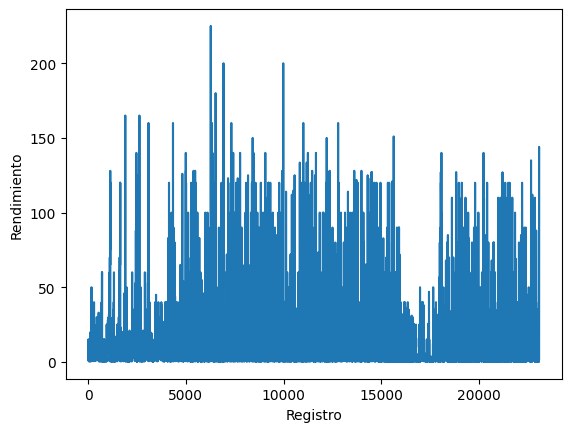

In [ ]:

# Seleccionar la columna que se desea graficar
columna = dataFrame_Boyaca['Rendimiento (t/ha)']

# Graficar los datos
plt.plot(columna)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Rendimiento')

# Mostrar el gráfico
plt.show()

# 2.Deteccion de datos anomalos 

## Determinación del umbral para Z-Score

In [ ]:
import pandas as pd
import numpy as np


# calcular la media y la desviación estándar de la columna 'columna_de_datos'
media = dataFrame_Boyaca['Rendimiento (t/ha)'].mean()
print("La media es: ", media)

desviacion_estandar = dataFrame_Boyaca['Rendimiento (t/ha)'].std()
print("La desviación estandar: ",desviacion_estandar )

# definir el umbral como una cierta cantidad de desviaciones estándar por encima de la media
umbral = media + (3 * desviacion_estandar)

# imprimir el umbral
print('El umbral de anormalidad es:', umbral)


La media es:  10.167712691466084
La desviación estandar:  15.992222694772357
El umbral de anormalidad es: 58.144380775783155


Implementación de Z-Score

In [ ]:
import pandas as pd
import statistics

# Seleccionar la columna de interés
col = 'Rendimiento (t/ha)'
data = dataFrame_Boyaca[col]

# Calcular el puntaje Z para cada punto de datos
mean = data.mean()
std = data.std()
threshold = umbral # Umbral de tolerancia
z_scores = [(x - mean) / std for x in data]

# Crear un dataframe para almacenar los registros anómalos
anomalies_df = pd.DataFrame(columns=dataFrame_Boyaca.columns)

print("Esta es la media de los scores ", statistics.mean(z_scores))

# Iterar a través de cada registro y comprobar si contiene valores anómalos
for i, score in enumerate(z_scores):
    if abs(score) > threshold:
        anomalies_df = anomalies_df.append(dataFrame_Boyaca.iloc[i])

# Imprimir los registros anómalos encontrados
print("Registros anómalos encontrados:")
print(anomalies_df)




Esta es la media de los scores  -6.092113502213675e-17
Registros anómalos encontrados:
Empty DataFrame
Columns: [TIPO, MUNICIPIO, CULTIVO, PERIODO, Area Sembrada (ha), Area Cosechada (ha), Produccion (t), Rendimiento (t/ha)]
Index: []


Atributo área sembrada

In [ ]:
# calcular la media y la desviación estándar de la columna 'columna_de_datos'
media = dataFrame_Boyaca['Area Sembrada (ha)'].mean()
print("La media es: ", media)

desviacion_estandar = dataFrame_Boyaca['Area Sembrada (ha)'].std()
print("La desviación estandar: ",desviacion_estandar )

# definir el umbral como una cierta cantidad de desviaciones estándar por encima de la media
umbral = media + (3 * desviacion_estandar)

# imprimir el umbral
print('El umbral de anormalidad es:', umbral)

# Seleccionar la columna de interés
col = 'Area Sembrada (ha)'
data = dataFrame_Boyaca[col]

# Calcular el puntaje Z para cada punto de datos
mean = data.mean()
std = data.std()
threshold = umbral # Umbral de tolerancia
z_scores = [(x - mean) / std for x in data]

# Crear un dataframe para almacenar los registros anómalos
anomalies_df = pd.DataFrame(columns=dataFrame_Boyaca.columns)

print("Esta es la media de los scores ", statistics.mean(z_scores))

# Iterar a través de cada registro y comprobar si contiene valores anómalos
for i, score in enumerate(z_scores):
    if abs(score) > threshold:
        anomalies_df = anomalies_df.append(dataFrame_Boyaca.iloc[i])

# Imprimir los registros anómalos encontrados
print("Registros anómalos encontrados:")
print(anomalies_df)



La media es:  77.71413085339167
La desviación estandar:  285.9560099991544
El umbral de anormalidad es: 935.5821608508548
Esta es la media de los scores  6.746537933525925e-17
Registros anómalos encontrados:
Empty DataFrame
Columns: [TIPO, MUNICIPIO, CULTIVO, PERIODO, Area Sembrada (ha), Area Cosechada (ha), Produccion (t), Rendimiento (t/ha)]
Index: []


# 3.Seleccion de atributos

## Algoritmo Random Forest 

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

# Cargar el conjunto de datos
data_atributte_selection = dataFrame_Boyaca.copy()

# Definir la columna target
target_column = "Rendimiento (t/ha)" 
target = data_atributte_selection[target_column].astype('int64')

# Separar los atributos numéricos y categóricos
numeric_features = data_atributte_selection.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data_atributte_selection.select_dtypes(include=['object']).columns

# Codificar los atributos categóricos
label_encoder = LabelEncoder()
for col in categorical_features:
    data_atributte_selection[col] = label_encoder.fit_transform(data_atributte_selection[col].astype(str))

# Escalar los atributos numéricos
scaler = StandardScaler()
data_atributte_selection[numeric_features] = scaler.fit_transform(data_atributte_selection[numeric_features])

# Calcular la importancia de los atributos utilizando la información mutua
selector = SelectKBest(mutual_info_classif, k=8)
selector.fit(data_atributte_selection, target)

# Obtener los índices de los atributos seleccionados
selected_indices = selector.get_support(indices=True)

# Obtener los nombres de los atributos seleccionados
selected_features = data_atributte_selection.columns[selected_indices]

# Crear un nuevo conjunto de datos con los atributos seleccionados
data_selected = data_atributte_selection[selected_features]
# print(data_selected)

# Calcular la importancia de los atributos utilizando la información mutua
scores = mutual_info_classif(data_atributte_selection, target)
feature_scores = list(zip(data_atributte_selection.columns, scores))

# Ordenar los atributos por relevancia de manera descendente
feature_scores_sorted = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Obtener los nombres de los atributos seleccionados
selected_features = [x[0] for x in feature_scores_sorted[:8]]

# Crear un nuevo conjunto de datos con los atributos seleccionados
data_selected = data_atributte_selection[selected_features]

# Imprimir los nombres de los atributos seleccionados en orden descendente junto con su relevancia
for feature, score in feature_scores_sorted:
    if feature in selected_features:
        print(feature, score)

print(selected_features)

Rendimiento (t/ha) 3.050867474154158
Produccion (t) 0.8719476063916893
CULTIVO 0.8315070215980729
MUNICIPIO 0.4010069606772375
Area Sembrada (ha) 0.14818147139804783
Area Cosechada (ha) 0.14652754601029772
PERIODO 0.10119747973547888
TIPO 0.09308816471171566
['Rendimiento (t/ha)', 'Produccion (t)', 'CULTIVO', 'MUNICIPIO', 'Area Sembrada (ha)', 'Area Cosechada (ha)', 'PERIODO', 'TIPO']


# Elimando la columna del atributo menos relevante

In [ ]:
dataFrame_Boyaca.drop('TIPO', axis=1, inplace=True)
print(dataFrame_Boyaca)

        MUNICIPIO           CULTIVO PERIODO  Area Sembrada (ha)  \
0         RAQUIRA             AGRAZ    2015               170.0   
1        BUSBANZA           AHUYAMA   2018A                 0.5   
2      BUENAVISTA          AGUACATE    2015                40.0   
3           COPER          AGUACATE    2015                 4.0   
4           COPER          AGUACATE    2015                20.0   
...           ...               ...     ...                 ...   
23075   Zetaquirá  Gulupa o cholupa    2021                14.0   
23076   Zetaquirá              Lulo    2021                 8.0   
23077   Zetaquirá            Tomate   2021A                 4.0   
23078   Zetaquirá            Tomate   2021B                 4.0   
23079   Zetaquirá            Frijol   2021B               350.0   

       Area Cosechada (ha)  Produccion (t)  Rendimiento (t/ha)  
0                    170.0          1360.0                 8.0  
1                      0.4             2.0                 5.0  


# 4.Transformacion de datos